In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import seaborn as sns
import statistics
import requests

%matplotlib inline

# 1. Загрузить файл hr.csv.

In [2]:
df=pd.read_csv('HR.csv')
df.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None


# 2. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).

In [4]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


Среднее значение:  0.6128335222348157
Медиана:  0.64
Значение моды: 0.1
Значение максимума:  1.0
Значение минимума:  0.09
Количество нулевых значений в столбце равно: 0
Значение стандартного отклонения:  0.2486223626820733
Размах выборки:  0.91


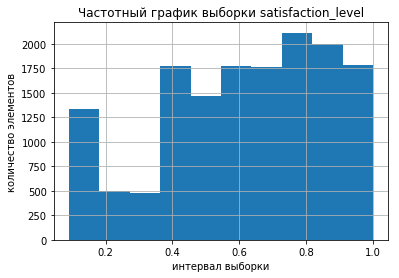

Уровень удовлетворённости сотрудника, данные цифровые, непрерывные, распределение близко к равномерному


In [4]:
# Столбец satisfaction_level

print('Среднее значение: ', statistics.mean(df['satisfaction_level']))
print('Медиана: ', statistics.median(df['satisfaction_level']))
print('Значение моды:', statistics.mode(df['satisfaction_level']))
print('Значение максимума: ', max(df['satisfaction_level']))
print('Значение минимума: ', min(df['satisfaction_level']))
print('Количество нулевых значений в столбце равно:', df['satisfaction_level'].isnull().sum())
print('Значение стандартного отклонения: ', statistics.pstdev(df['satisfaction_level'].dropna()))
print('Размах выборки: ', max(df['satisfaction_level'])-min(df['satisfaction_level']))

plt.hist(df['satisfaction_level'],10)
plt.xlabel('интервал выборки')
plt.ylabel('количество элементов')
plt.title('Частотный график выборки satisfaction_level')
plt.grid(True)
plt.show()

print('Уровень удовлетворённости сотрудника, данные цифровые, непрерывные, распределение близко к равномерному')

Среднее значение:  0.7161017401160077
Медиана:  0.72
Значение моды: 0.55
Значение максимума:  1.0
Значение минимума:  0.36
Количество нулевых значений в столбце равно: 0
Значение стандартного отклонения:  0.1711634045107436
Размах выборки:  0.64


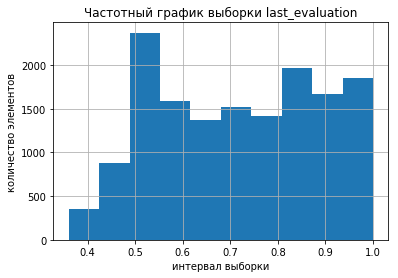

Последняя оценка эффективности сотрудника, данные цифровые, непрерывные, распределение близко к равномерному


In [5]:
# Столбец 	last_evaluation

print('Среднее значение: ', statistics.mean(df['last_evaluation']))
print('Медиана: ', statistics.median(df['last_evaluation']))
print('Значение моды:', statistics.mode(df['last_evaluation']))
print('Значение максимума: ', max(df['last_evaluation']))
print('Значение минимума: ', min(df['last_evaluation']))
print('Количество нулевых значений в столбце равно:', df['last_evaluation'].isnull().sum())
print('Значение стандартного отклонения: ', statistics.pstdev(df['last_evaluation'].dropna()))
print('Размах выборки: ', max(df['last_evaluation'])-min(df['last_evaluation']))

plt.hist(df['last_evaluation'],10)
plt.xlabel('интервал выборки')
plt.ylabel('количество элементов')
plt.title('Частотный график выборки last_evaluation')
plt.grid(True)
plt.show()

print('Последняя оценка эффективности сотрудника, данные цифровые, непрерывные, распределение близко к равномерному')

Среднее значение:  3.80305353690246
Медиана:  4
Значение моды: 4
Значение максимума:  7
Значение минимума:  2
Количество нулевых значений в столбце равно: 0
Значение стандартного отклонения:  1.2325512654823438
Размах выборки:  5


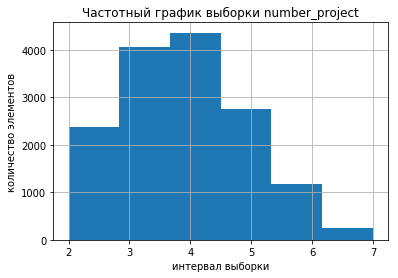

Число проектов, в которых участвовал сотрудник, данные цифровые, дискретные, целочисленные, распределение логнормальное


In [6]:
# Столбец  3	number_project

print('Среднее значение: ', statistics.mean(df['number_project']))
print('Медиана: ', statistics.median(df['number_project']))
print('Значение моды:', statistics.mode(df['number_project']))
print('Значение максимума: ', max(df['number_project']))
print('Значение минимума: ', min(df['number_project']))
print('Количество нулевых значений в столбце равно:', df['number_project'].isnull().sum())
print('Значение стандартного отклонения: ', statistics.pstdev(df['number_project'].dropna()))
print('Размах выборки: ', max(df['number_project'])-min(df['number_project']))

plt.hist(df['number_project'],6)
plt.xlabel('интервал выборки')
plt.ylabel('количество элементов')
plt.title('Частотный график выборки number_project')
plt.grid(True)
plt.show()

print('Число проектов, в которых участвовал сотрудник, данные цифровые, дискретные, целочисленные, распределение логнормальное')


Среднее значение:  201.0503366891126
Медиана:  200
Значение моды определеить не удалось, в распределении два наиболее часто встречающихся значения
Значение максимума:  310
Значение минимума:  96
Количество нулевых значений в столбце равно: 0
Значение стандартного отклонения:  49.94143446256218
Размах выборки:  214


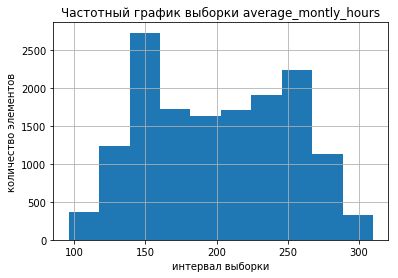

Среднее количество рабочих часов в месяц, данные цифровые, непрерывные, целочисленные, распределение двумодальное, немного напоминает нормальное


In [7]:
# Столбец  4	average_montly_hours

print('Среднее значение: ', statistics.mean(df['average_montly_hours']))
print('Медиана: ', statistics.median(df['average_montly_hours']))
print('Значение моды определеить не удалось, в распределении два наиболее часто встречающихся значения')
print('Значение максимума: ', max(df['average_montly_hours']))
print('Значение минимума: ', min(df['average_montly_hours']))
print('Количество нулевых значений в столбце равно:', df['average_montly_hours'].isnull().sum())
print('Значение стандартного отклонения: ', statistics.pstdev(df['average_montly_hours'].dropna()))
print('Размах выборки: ', max(df['average_montly_hours'])-min(df['average_montly_hours']))

plt.hist(df['average_montly_hours'],10)
plt.xlabel('интервал выборки')
plt.ylabel('количество элементов')
plt.title('Частотный график выборки average_montly_hours')
plt.grid(True)
plt.show()

print('Среднее количество рабочих часов в месяц, данные цифровые, непрерывные, целочисленные, распределение двумодальное, немного напоминает нормальное')


Среднее значение:  3.498233215547703
Медиана:  3
Значение моды: 3
Значение максимума:  10
Значение минимума:  2
Количество нулевых значений в столбце равно: 0
Значение стандартного отклонения:  1.4600875552715114
Размах выборки:  8


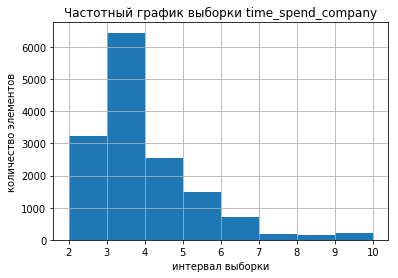

Сколько времени сотрудник поработал в компании, данные цифровые, целочисленные, дискретные, распределение геометрическое


In [8]:
# Столбец  5	time_spend_company

print('Среднее значение: ', statistics.mean(df['time_spend_company']))
print('Медиана: ', statistics.median(df['time_spend_company']))
print('Значение моды:', statistics.mode(df['time_spend_company']))
print('Значение максимума: ', max(df['time_spend_company']))
print('Значение минимума: ', min(df['time_spend_company']))
print('Количество нулевых значений в столбце равно:', df['time_spend_company'].isnull().sum())
print('Значение стандартного отклонения: ', statistics.pstdev(df['time_spend_company'].dropna()))
print('Размах выборки: ', max(df['time_spend_company'])-min(df['time_spend_company']))

plt.hist(df['time_spend_company'],8)
plt.xlabel('интервал выборки')
plt.ylabel('количество элементов')
plt.title('Частотный график выборки time_spend_company')
plt.grid(True)
plt.show()

print('Сколько времени сотрудник поработал в компании, данные цифровые, целочисленные, дискретные, распределение геометрическое')


Среднее значение:  0.1446096406427095
Медиана:  0
Значение моды: 0
Значение максимума:  1
Значение минимума:  0
Количество нулевых значений в столбце равно: 0
Значение стандартного отклонения:  0.3517068274513532
Размах выборки:  1


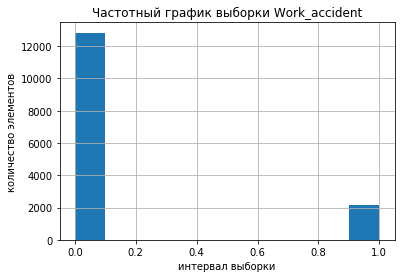

Информация о наличии инцидентов на работе, данные логические (булевы), распределение Бернулли


In [9]:

# Столбец 6	Work_accident

print('Среднее значение: ', statistics.mean(df['Work_accident']))
print('Медиана: ', statistics.median(df['Work_accident']))
print('Значение моды:', statistics.mode(df['Work_accident']))
print('Значение максимума: ', max(df['Work_accident']))
print('Значение минимума: ', min(df['Work_accident']))
print('Количество нулевых значений в столбце равно:', df['Work_accident'].isnull().sum())
print('Значение стандартного отклонения: ', statistics.pstdev(df['Work_accident'].dropna()))
print('Размах выборки: ', max(df['Work_accident'])-min(df['Work_accident']))

plt.hist(df['Work_accident'])
plt.xlabel('интервал выборки')
plt.ylabel('количество элементов')
plt.title('Частотный график выборки Work_accident')
plt.grid(True)
plt.show()

print('Информация о наличии инцидентов на работе, данные логические (булевы), распределение Бернулли')



Среднее значение:  0.2380825388359224
Медиана:  0
Значение моды: 0
Значение максимума:  1
Значение минимума:  0
Количество нулевых значений в столбце равно: 0
Значение стандартного отклонения:  0.42590990072709495
Размах выборки:  1


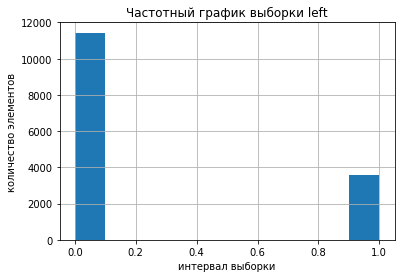

Информация об уходе из компании, данные логические (булевы), распределение Бернулли


In [10]:
# Столбец 7 	left

print('Среднее значение: ', statistics.mean(df['left']))
print('Медиана: ', statistics.median(df['left']))
print('Значение моды:', statistics.mode(df['left']))
print('Значение максимума: ', max(df['left']))
print('Значение минимума: ', min(df['left']))
print('Количество нулевых значений в столбце равно:', df['left'].isnull().sum())
print('Значение стандартного отклонения: ', statistics.pstdev(df['left'].dropna()))
print('Размах выборки: ', max(df['left'])-min(df['left']))

plt.hist(df['left'],10)
plt.xlabel('интервал выборки')
plt.ylabel('количество элементов')
plt.title('Частотный график выборки left')
plt.grid(True)
plt.show()

print('Информация об уходе из компании, данные логические (булевы), распределение Бернулли')


Среднее значение:  0.021268084538969265
Медиана:  0
Значение моды: 0
Значение максимума:  1
Значение минимума:  0
Количество нулевых значений в столбце равно: 0
Значение стандартного отклонения:  0.14427665479561314
Размах выборки:  1


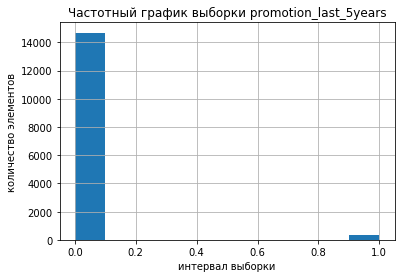

Информация о повышении за последние 5 лет, данные логические (булевы), распределение Бернулли


In [11]:
# Столбец 8	promotion_last_5years

print('Среднее значение: ', statistics.mean(df['promotion_last_5years']))
print('Медиана: ', statistics.median(df['promotion_last_5years']))
print('Значение моды:', statistics.mode(df['promotion_last_5years']))
print('Значение максимума: ', max(df['promotion_last_5years']))
print('Значение минимума: ', min(df['promotion_last_5years']))
print('Количество нулевых значений в столбце равно:', df['promotion_last_5years'].isnull().sum())
print('Значение стандартного отклонения: ', statistics.pstdev(df['promotion_last_5years'].dropna()))
print('Размах выборки: ', max(df['promotion_last_5years'])-min(df['promotion_last_5years']))

plt.hist(df['promotion_last_5years'],10)
plt.xlabel('интервал выборки')
plt.ylabel('количество элементов')
plt.title('Частотный график выборки promotion_last_5years')
plt.grid(True)
plt.show()

print('Информация о повышении за последние 5 лет, данные логические (булевы), распределение Бернулли')


In [ ]:
# Столбец 9	sales

# print('Среднее значение: ', statistics.mean(df['sales']))
print('Медиана: ', statistics.median(df['sales']))
print('Значение моды:', statistics.mode(df['sales']))
print('Значение максимума: ', max(df['sales']))
print('Значение минимума: ', min(df['sales']))
print('Количество нулевых значений в столбце равно:', df['sales'].isnull().sum())
# print('Значение стандартного отклонения: ', statistics.pstdev(df['sales'].dropna()))
# print('Размах выборки: ', max(df['sales'])-min(df['sales']))

plt.hist(df['sales'],10)
plt.xlabel('интервал выборки')
plt.ylabel('количество элементов')
plt.title('Частотный график выборки sales')
plt.grid(True)
plt.show()

print('Информация  о сфере работы, данные текстовые, дискретные')


Медиана:  sales
Значение моды: sales
Значение максимума:  technical
Значение минимума:  IT
Количество нулевых значений в столбце равно: 0


In [ ]:
# Столбец 10	salary

# print('Среднее значение: ', statistics.mean(df['salary']))
# print('Медиана: ', statistics.median(df['salary']))
# print('Значение моды:', statistics.mode(df['salary']))
# print('Значение максимума: ', max(df['salary']))
# print('Значение минимума: ', min(df['salary']))
# print('Количество нулевых значений в столбце равно:', df['salary'].isnull().sum())
# print('Значение стандартного отклонения: ', statistics.pstdev(df['salary'].dropna()))
# print('Размах выборки: ', max(df['salary'])-min(df['salary']))

# plt.hist(df['salary'],10)
# plt.xlabel('интервал выборки')
# plt.ylabel('количество элементов')
# plt.title('Частотный график выборки salary')
# plt.grid(True)
# plt.show()

print('Информация об уровне продаж, данные текстовые, дискретные')


# 3.Рассчитать и визуализировать корреляционную матрицу для переменных.print('вот и матрица корреляций')

In [38]:
df.corr()
print('Матрица корреляций в виде таблицы. Выявлено не так много сильных корреляций между значениями\nОднако кое-что есть, например отрицательная связь между уровнем удовлевторённости и уходом из компании')

Матрица корреляций в виде таблицы. Выявлено не так много сильных корреляций между значениями
Однако кое-что есть, например отрицательная связь между уровнем удовлевторённости и уходом из компании


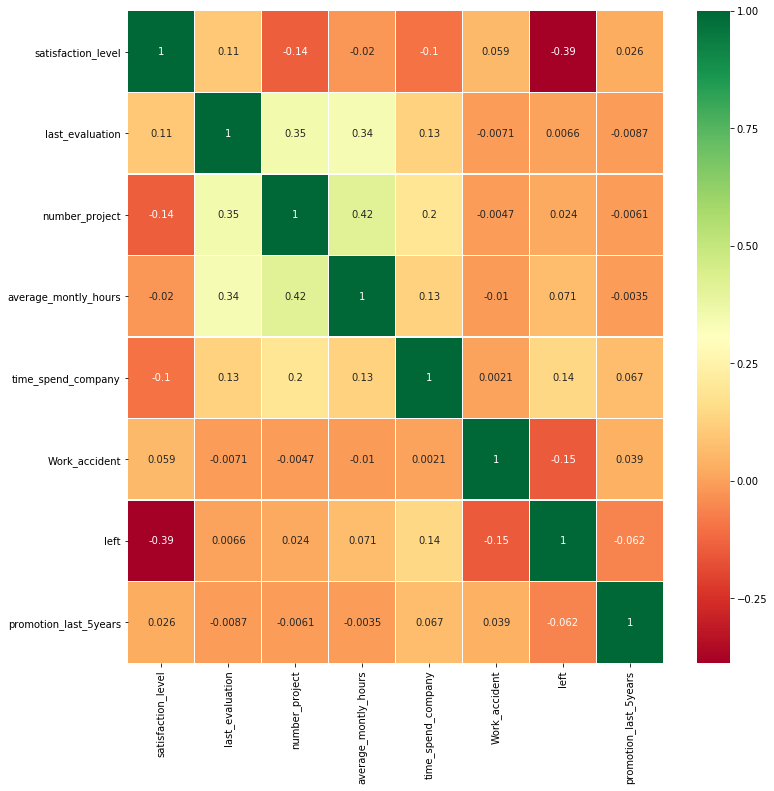

In [5]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

# 4.Визуализировать несколько взаимосвязей между переменными.

Сначала черновик: нарисовал матрицу ковариаций попарно - кривую и косую)


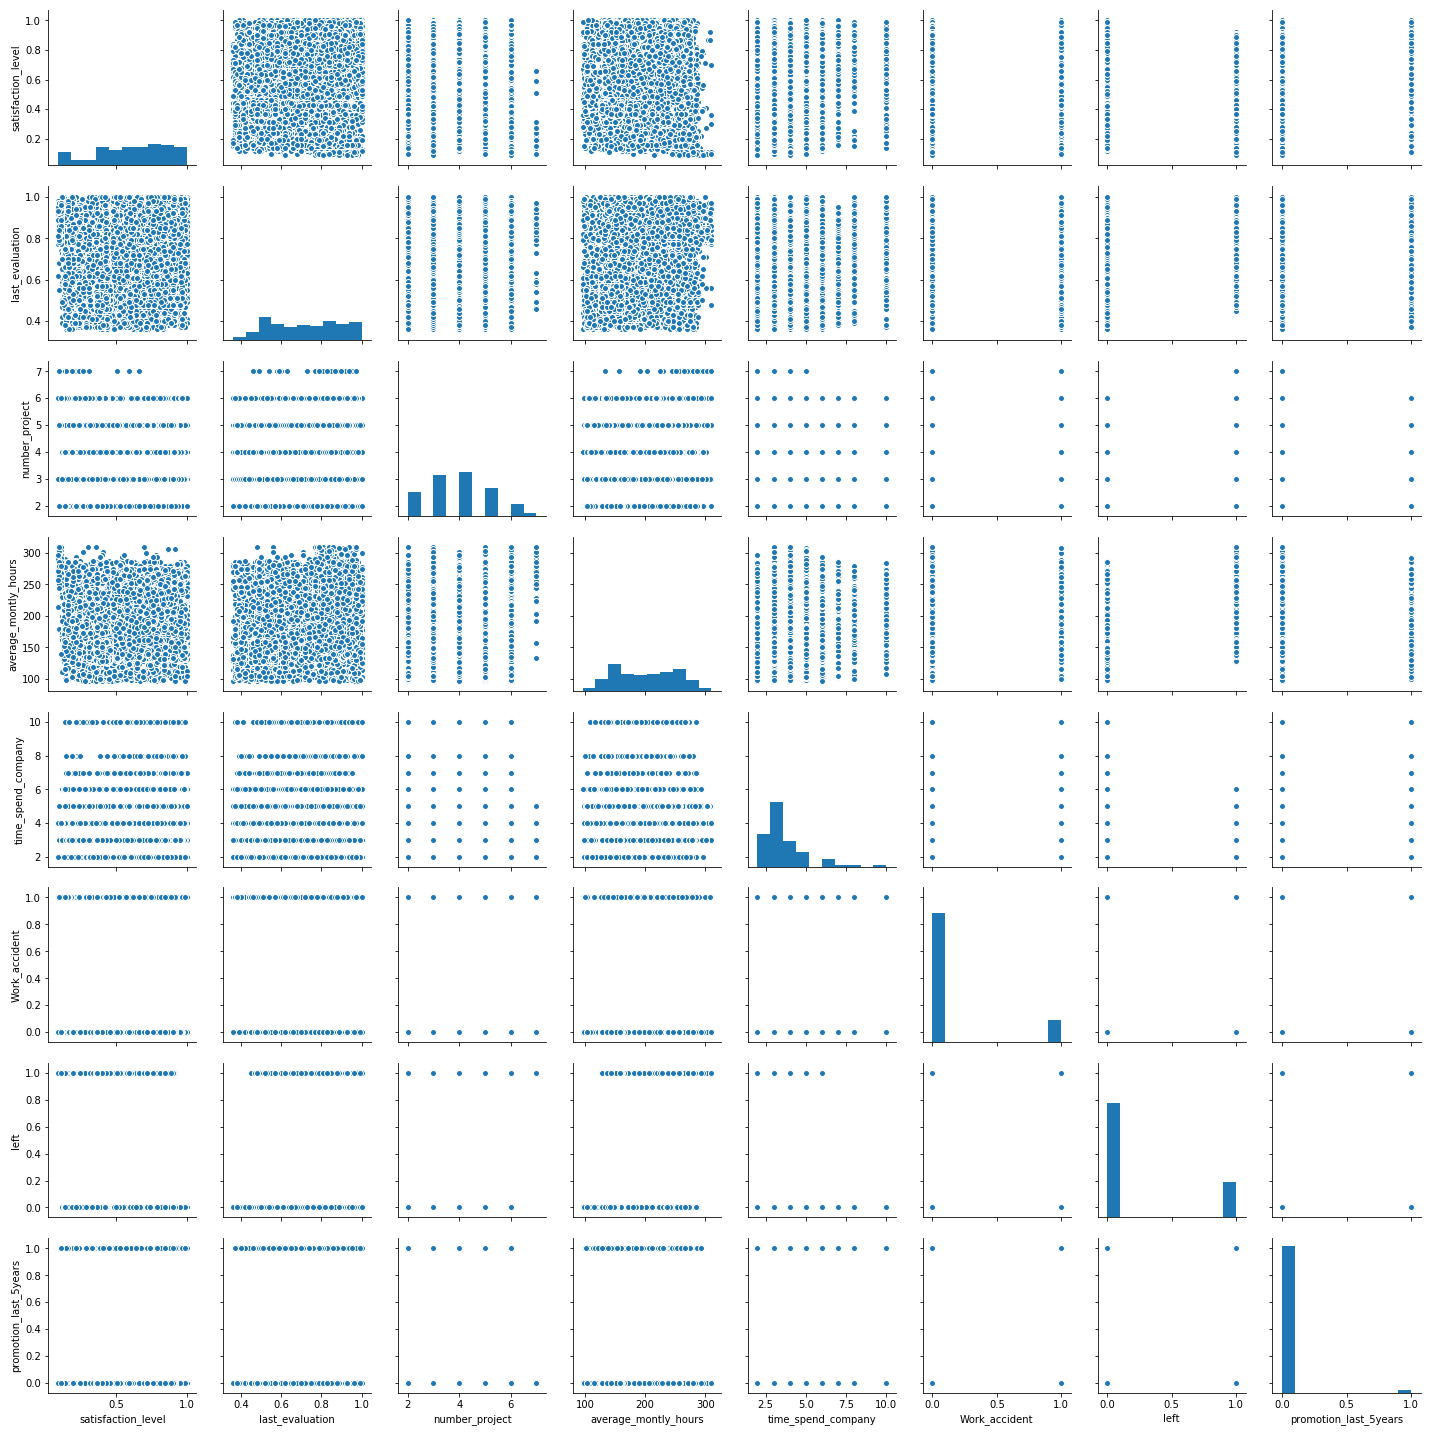

In [7]:
df1 = df.dropna()
sns_plot = sns.pairplot(df1)
print('Сначала черновик: нарисовал матрицу ковариаций попарно - кривую и косую)')

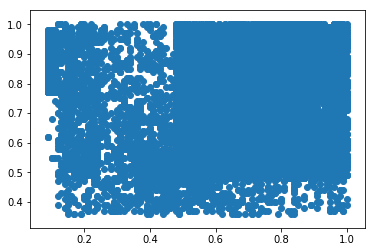

In [31]:
plt.scatter(df.satisfaction_level, df.last_evaluation)



# 5.С использованием t-test статистики проверить взаимосвязи между несколькими переменными.

In [32]:

from scipy.stats import ttest_ind
ttest_ind(df['satisfaction_level'], df['last_evaluation'])

Ttest_indResult(statistic=-41.89868154070206, pvalue=0.0)

In [33]:
ttest_ind(df['satisfaction_level'], df['left'])

Ttest_indResult(statistic=93.06077566920372, pvalue=0.0)

In [34]:
ttest_ind(df['last_evaluation'], df['number_project'])

Ttest_indResult(statistic=-303.8042100031241, pvalue=0.0)

# 6.Рассчитать сколько работников работает в каждом департаменте.

In [8]:
# фильтруем таблицу, удаляя всех уволившихся
df_noleft = df[df['left'] == 0]

# пересчитываем оставшихся
df_noleft['sales'].value_counts()

sales          3126
technical      2023
support        1674
IT              954
product_mng     704
RandD           666
marketing       655
accounting      563
management      539
hr              524
Name: sales, dtype: int64

# 7.Показать распределение сотрудников по зарплатам.

In [9]:

# группируем и отрезаем ненужные столбцы
df_salary = df_noleft.groupby('salary').count().loc[:, :'satisfaction_level']

# немного подправляем оформление, индексы не обновляем
df_salary = df_salary.reindex(["low", "medium", "high"])
df_salary=df_salary.rename(columns = {'satisfaction_level':'number of employees'})
df_salary.head()

,number of employees
salary,
low,5144
medium,5129
high,1155


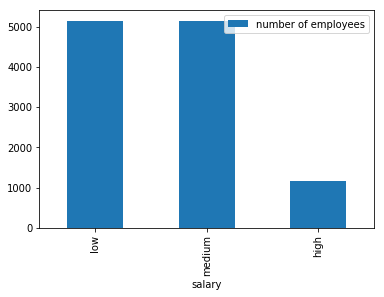

In [10]:
df_salary.plot.bar()

# 8.Показать распределение сотрудников по зарплатам совместно с департаментами.

In [10]:
# отсекаем нужные данные
df2 = df.loc[: , 'sales':'salary']
df2.head()

,sales,salary
0,sales,low
1,sales,medium
2,sales,medium
3,sales,low
4,sales,low


In [11]:
# пишем программу цифровизатор
def f(row):
    if row['salary'] == 'low':
        val = 0
    elif row['salary'] == 'medium':
        val = 1
    else:
        val = 2
    return val

df2['salary_digital'] = df2.apply(f, axis=1)
df2.head()

,sales,salary,salary_digital
0,sales,low,0
1,sales,medium,1
2,sales,medium,1
3,sales,low,0
4,sales,low,0


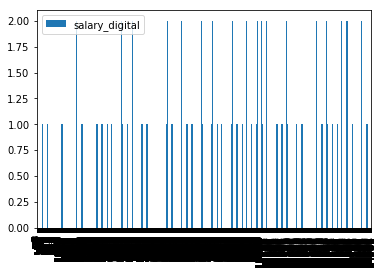

In [30]:
df2.plot.bar()

# 9.Сколько сотрудников покинули компанию.

In [23]:
# считаем длину отфильтрованного дата-фрейма
print("Число покинувших компанию сотрудников равно: ",len(df[df['left'] == 1]))


Число покинувших компанию сотрудников равно:  3571


# 10.Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.

In [35]:

print("Я немного в затруднении, потому что раз никаких корреляций нет, то соответственно и никаких гипотез тоже нет")

Я немного в затруднении, потому что раз никаких корреляций нет, то соответственно и никаких гипотез тоже нет


In [12]:
df['salary_digital'] = df.apply(f, axis=1)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,salary_digital
0,0.38,0.53,2,157,3,0,1,0,sales,low,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,0


In [ ]:
print("Даже если перевести зарплату в цифры - все равно получается ерунда, не выше 0.16")

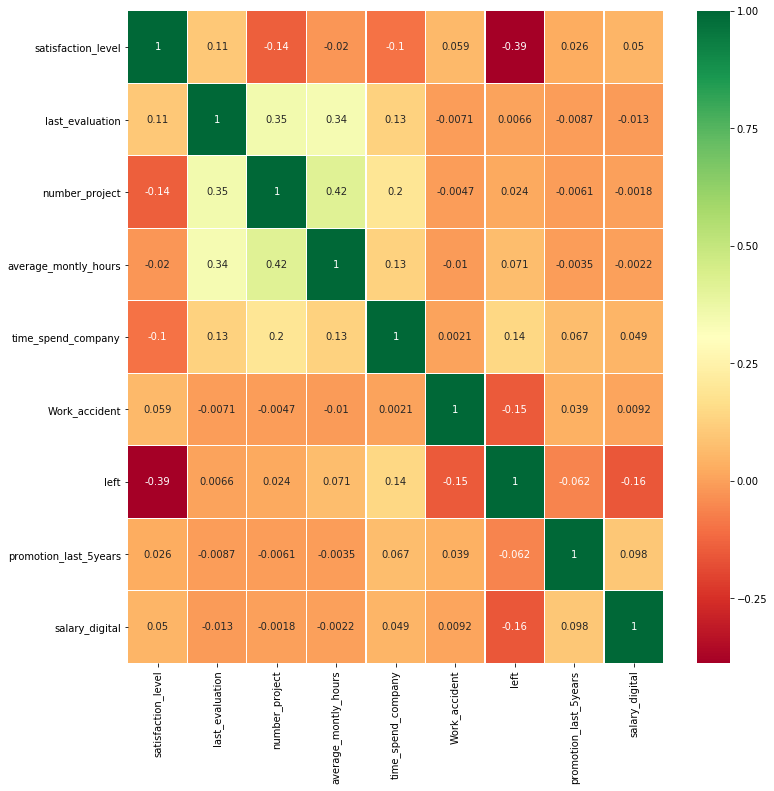

In [39]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

In [5]:
df['satisfaction_level'].corr(df['Work_accident'])

0.058697241051972035

In [13]:
df['Work_accident'].corr(df['salary_digital'])

0.00924732794582975

In [14]:
df['satisfaction_level'].corr(df['salary_digital'])

0.050022480815256246

In [15]:
print("нет тут никакой зависиомсти")

нет тут никакой зависиомсти
